In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached debugpy-1.8.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.5 MB)
  Using cached executing-2.0.0-py2.py3-none-any.whl (24 kB)
  Using cached ipython-8.12.3-py3-none-any.whl (798 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Using cached jupyter_client-8.4.0-py3-none-any.whl (103 kB)
  Using cached jupyter_core-5.4.0-py3-none-any.whl (28 kB)
  Using cached nest_asyncio-1.5.8-py3-none-any.whl (5.3 kB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached packaging-23.2-py3-none-any.whl (53 kB)
  Using cached pexpect-4.8.0-py2.py3-none-any.whl (59 kB)
  Using cached platformdirs-3.11.0-py3-none-any.whl (17 kB)
  Using cached psutil-5.9.6-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (283 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cache

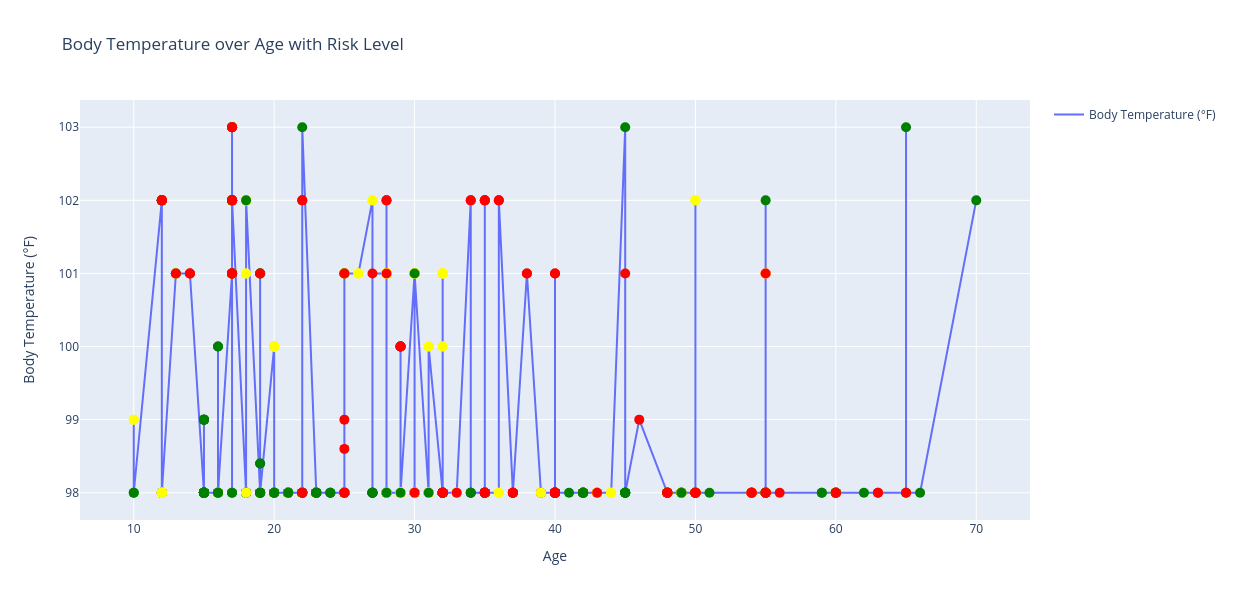

In [15]:
# Mengimpor pustaka Pandas dan memberi alias pd
import pandas as pd

# Mengimpor pustaka Plotly's graph_objs dan memberi alias go
import plotly.graph_objs as go

# Membaca data dari file Excel 'data_kesehatan.xlsx' dan menyimpannya dalam objek DataFrame yang disebut 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur)
data = data.sort_values(by='Age')

# Mengambil kolom 'Age' (umur) dari DataFrame dan menyimpannya dalam variabel 'x'
x = data['Age']

# Mengambil kolom 'BodyTemp(fahrenheit)' (suhu tubuh dalam Fahrenheit) dari DataFrame dan menyimpannya dalam variabel 'y'
y = data['BodyTemp(fahrenheit)']

# Mengambil kolom 'RiskLevel' (tingkat risiko) dari DataFrame dan menyimpannya dalam variabel 'risk_levels'
risk_levels = data['RiskLevel']

# Mendefinisikan peta warna untuk tingkat risiko
color_mapping = {'low risk': 'green', 'mid risk': 'yellow', 'high risk': 'red'}

# Membuat objek grafik kosong menggunakan Plotly's Figure
fig = go.Figure()

# Menambahkan trace berupa garis pada grafik dengan data 'x' (umur) dan 'y' (suhu tubuh) serta memberi nama 'Body Temperature (°F)'
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Body Temperature (°F)'))

# Loop untuk setiap titik data dalam DataFrame
for i in range(len(x)):
    # Mengambil tingkat risiko
    risk_level = risk_levels[i]
    
    # Menentukan warna marker berdasarkan tingkat risiko dengan default menjadi 'gray' jika tidak ada di dalam peta warna
    marker_color = color_mapping.get(risk_level, 'gray')
    
    # Menambahkan trace berupa marker dengan warna dan teks hover yang sesuai
    fig.add_trace(go.Scatter(
        x=[x[i]],
        y=[y[i]],
        mode='markers',
        marker=dict(color=marker_color, size=10),
        name='',
        showlegend=False,
        hovertext=f"Age: {x[i]}, Temperature: {y[i]}°F, Risk Level: {risk_level}"
    ))

# Mengatur layout grafik, termasuk judul, label sumbu, lebar, dan tinggi
fig.update_layout(
    title='Body Temperature over Age with Risk Level',
    xaxis_title='Age',
    yaxis_title='Body Temperature (°F)',
    width=1200,
    height=600
)

# Menampilkan grafik yang telah dibuat
fig.show()


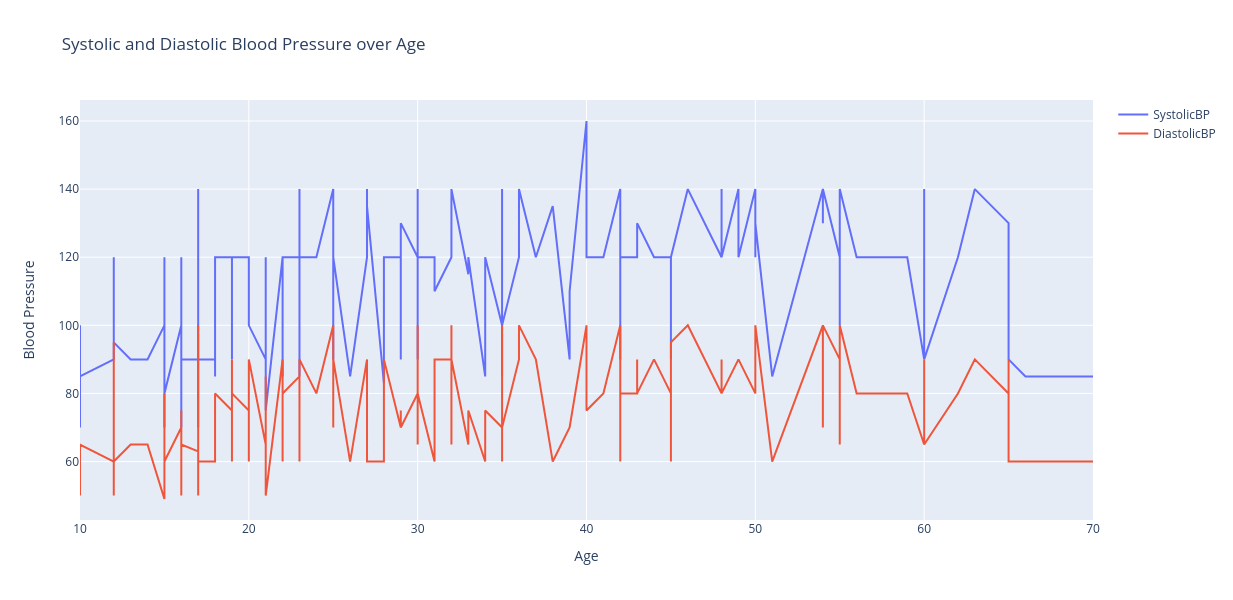

In [66]:
# Mengimpor pustaka Pandas dan memberi alias pd
import pandas as pd

# Mengimpor pustaka Plotly's graph_objs dan memberi alias go
import plotly.graph_objs as go

# Membaca data dari file Excel 'data_kesehatan.xlsx' dan menyimpannya dalam objek DataFrame yang disebut 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur)
data = data.sort_values(by='Age')

# Mengambil kolom 'Age' (umur) dari DataFrame dan menyimpannya dalam variabel 'x'
x = data['Age']

# Mengambil kolom 'SystolicBP' (tekanan darah sistolik) dari DataFrame dan menyimpannya dalam variabel 'systolic_bp'
systolic_bp = data['SystolicBP']

# Mengambil kolom 'DiastolicBP' (tekanan darah diastolik) dari DataFrame dan menyimpannya dalam variabel 'diastolic_bp'
diastolic_bp = data['DiastolicBP']

# Membuat objek grafik kosong menggunakan Plotly's Figure
fig = go.Figure()

# Menambahkan trace berupa garis pada grafik untuk 'SystolicBP' dengan data 'x' (umur) dan 'systolic_bp' sebagai sumbu Y
fig.add_trace(go.Scatter(x=x, y=systolic_bp, mode='lines', name='SystolicBP'))

# Menambahkan trace berupa garis pada grafik untuk 'DiastolicBP' dengan data 'x' (umur) dan 'diastolic_bp' sebagai sumbu Y
# Berbeda dengan 'SystolicBP', 'DiastolicBP' menggunakan gaya garis yang berbeda
fig.add_trace(go.Scatter(x=x, y=diastolic_bp, mode='lines', name='DiastolicBP'))

# Mengatur layout grafik, termasuk judul, label sumbu, lebar, dan tinggi
fig.update_layout(
    title='Systolic and Diastolic Blood Pressure over Age',
    xaxis_title='Age',
    yaxis_title='Blood Pressure',
    width=1200,
    height=600
)

# Menampilkan grafik yang telah dibuat
fig.show()


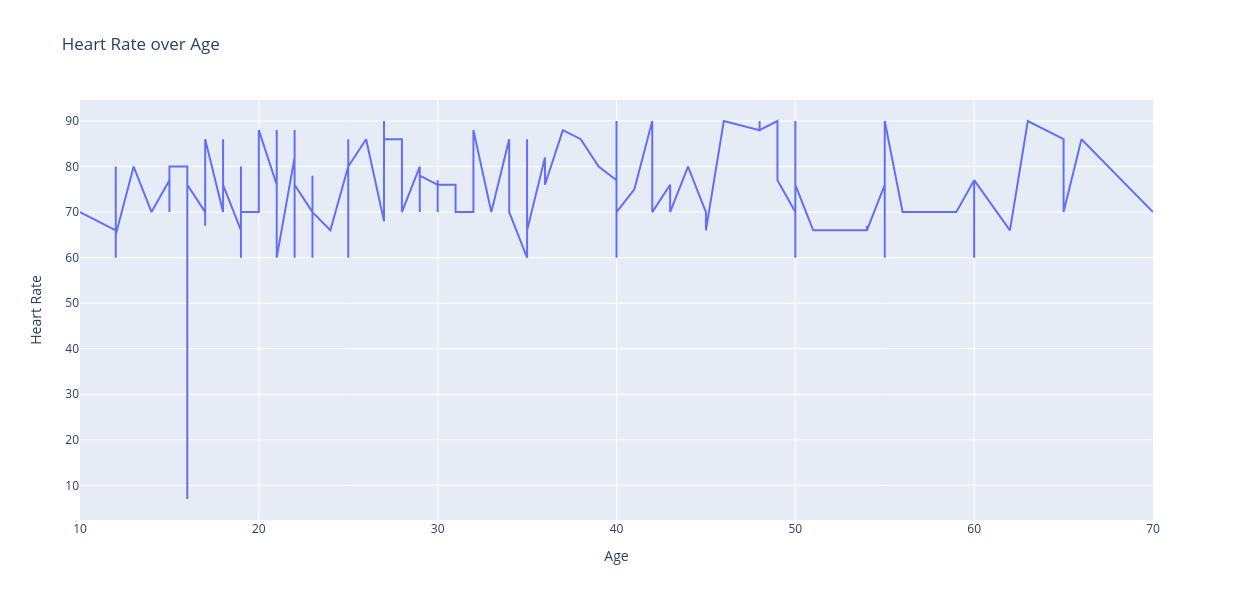

In [74]:
# Mengimpor pustaka Pandas dan memberi alias pd
import pandas as pd

# Mengimpor pustaka Plotly's graph_objs dan memberi alias go
import plotly.graph_objs as go

# Membaca data dari file Excel 'data_kesehatan.xlsx' dan menyimpannya dalam objek DataFrame yang disebut 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur)
data = data.sort_values(by='Age')

# Mengambil kolom 'Age' (umur) dari DataFrame dan menyimpannya dalam variabel 'x'
x = data['Age']

# Mengambil kolom 'HeartRate' (detak jantung) dari DataFrame dan menyimpannya dalam variabel 'y'
y = data['HeartRate']

# Membuat objek grafik kosong menggunakan Plotly's Figure
fig = go.Figure()

# Menambahkan trace berupa garis pada grafik untuk 'HeartRate' dengan data 'x' (umur) dan 'y' sebagai sumbu Y
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Heart Rate'))

# Mengatur layout grafik, termasuk judul, label sumbu, lebar, dan tinggi
fig.update_layout(
    title='Heart Rate over Age',
    xaxis_title='Age',
    yaxis_title='Heart Rate',
    width=1200,
    height=600
)

# Menampilkan grafik yang telah dibuat
fig.show()


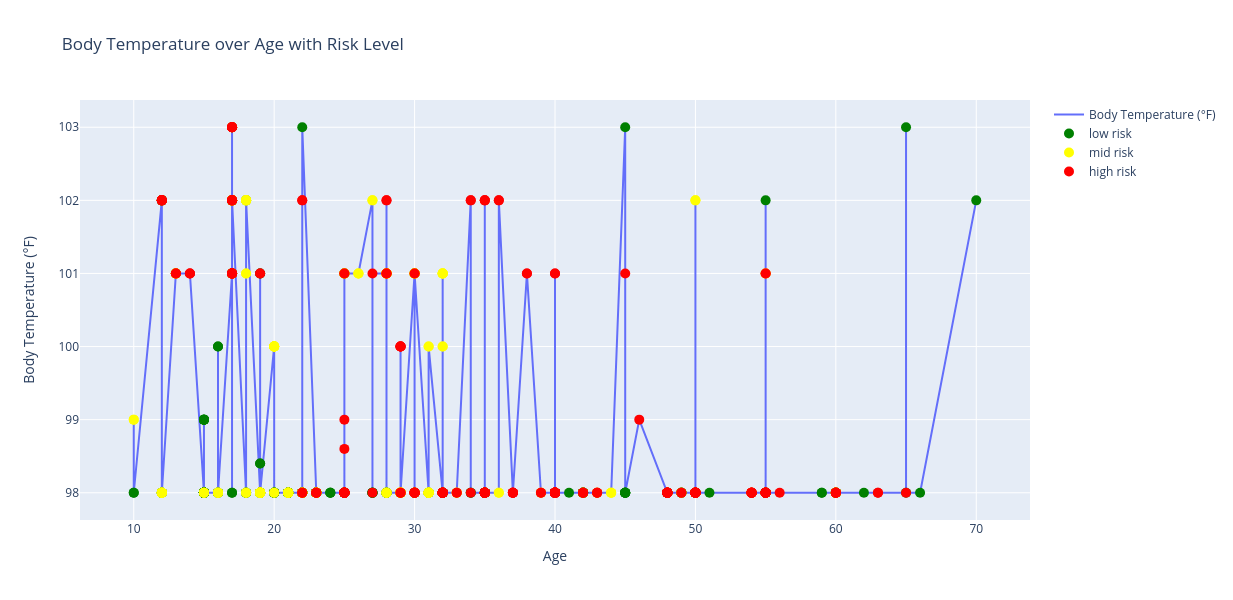

In [13]:
import pandas as pd
import plotly.graph_objs as go

data = pd.read_excel('data/data_kesehatan.xlsx')

# Sort the DataFrame by 'Age'
data = data.sort_values(by='Age')

x = data['Age']
y = data['BodyTemp(fahrenheit)']
risk_levels = data['RiskLevel']

# Define color mappings for risk levels
color_mapping = {'low risk': 'green', 'mid risk': 'yellow', 'high risk': 'red'}

fig = go.Figure()

# Add the line chart trace
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Body Temperature (°F)'))

# Create separate traces for each risk level
for risk_level, color in color_mapping.items():
    x_risk = [x[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    y_risk = [y[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    hover_text = [f"Age: {x[i]}, Temp: {y[i]}°F, Risk Level: {risk_levels[i]}" for i in range(len(x)) if risk_levels[i] == risk_level]

    fig.add_trace(go.Scatter(
        x=x_risk,
        y=y_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=risk_level,
        hovertext=hover_text
    ))

fig.update_layout(
    title='Body Temperature over Age with Risk Level',
    xaxis_title='Age',
    yaxis_title='Body Temperature (°F)',
    width=1200,
    height=600
)

fig.show()
